In [2]:
print("test")

test


In [3]:
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.utils import to_categorical
import datetime
import numpy as np

In [4]:
import os 
import cv2

In [33]:
from matplotlib import pyplot as plt

In [28]:
X = []
y = []
path = r"E:\IITB\Semester_2\EE_769\Assignments\Projects\Sudoku\Resources"
for i in range(10):
    for d in os.listdir("data/{}".format(i)):
        img = cv2.imread("data/{}".format(i) +"/" + d)
        img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        X.append(img)
        y.append(i)

In [29]:
x_array = np.array(X)
y_array = np.array(y)
print("Shape of X is : \n",x_array.shape)
print("Shape of Y is : \n",y_array.shape)

Shape of X is : 
 (6299, 28, 28)
Shape of Y is : 
 (6299,)


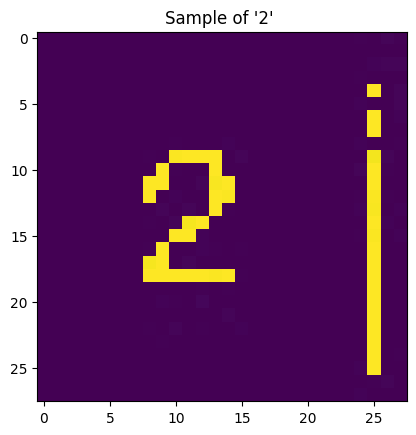

In [42]:
plt.imshow(X[2030])
plt.title("Sample of '2' ")
plt.show()

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x_array,y_array,test_size=0.2,random_state=42)

In [45]:
x_train.shape

(5039, 28, 28)

In [48]:
x_test.shape

(1260, 28, 28)

In [49]:
#Reshaping the data in 4D array for CNN
#float32 is the standard data type of many CNNs
X_train = x_train.reshape((x_train.shape[0], 28, 28, 1)).astype('float32')
X_test = x_test.reshape((x_test.shape[0], 28, 28, 1)).astype('float32')

In [50]:
# Normalizing the inputs to 0-1

x_train = x_train / 255
x_test = x_test / 255



In [51]:
# One hot encoding the outputs

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print("The Shape of Testing set y is : \n ",y_test.shape)
print("The number of classes is : \n ", y_test.shape[1])

The Shape of Testing set y is : 
  (1260, 10)
The number of classes is : 
  10


In [71]:
x_test[0].shape

(28, 28)

In [54]:
model = keras.Sequential(
    [
        Conv2D(30, (5, 5), input_shape=(28, 28, 1), activation='relu'),
        MaxPooling2D(),
        Conv2D(15, (3, 3), activation='relu'),
        MaxPooling2D(),
        Dropout(0.2),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(50, activation='relu'),
        Dense(10, activation='softmax')
])
    

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [55]:
model.fit(x_train,y_train,validation_data = (x_test,y_test),epochs = 10, batch_size = 20)


Epoch 1/10
252/252 [==============================] - 26s 40ms/step - loss: 1.5572 - accuracy: 0.4451 - val_loss: 0.9086 - val_accuracy: 0.7183
Epoch 2/10
252/252 [==============================] - 7s 28ms/step - loss: 0.6775 - accuracy: 0.7716 - val_loss: 0.4002 - val_accuracy: 0.8778
Epoch 3/10
252/252 [==============================] - 7s 26ms/step - loss: 0.3722 - accuracy: 0.8849 - val_loss: 0.2440 - val_accuracy: 0.9238
Epoch 4/10
252/252 [==============================] - 7s 27ms/step - loss: 0.2587 - accuracy: 0.9204 - val_loss: 0.1816 - val_accuracy: 0.9429
Epoch 5/10
252/252 [==============================] - 7s 29ms/step - loss: 0.1715 - accuracy: 0.9474 - val_loss: 0.1588 - val_accuracy: 0.9556
Epoch 6/10
252/252 [==============================] - 8s 31ms/step - loss: 0.1277 - accuracy: 0.9597 - val_loss: 0.1253 - val_accuracy: 0.9690
Epoch 7/10
252/252 [==============================] - 7s 29ms/step - loss: 0.1035 - accuracy: 0.9692 - val_loss: 0.1344 - val_accuracy: 0.963

In [58]:
pred = model.predict(x_test,verbose =1)
pred.shape

40/40 [==============================] - 0s 10ms/step


(1260, 10)

In [67]:
prediction = np.argmax(pred[3])
prediction

5

In [69]:
probab = np.amax(pred[3])
probab

0.9993892

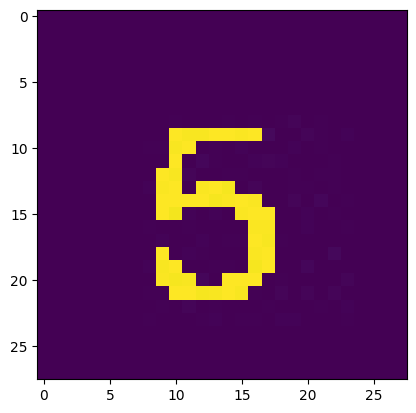

In [66]:
plt.imshow(x_test[3])
plt.show()

In [68]:
model.save("modelsolver_v1.h5")
print("Model Saved!")
print("\n Saved Model Summary: \n")
model.summary()

Model Saved!

 Saved Model Summary: 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 24, 24, 30)        780       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 12, 12, 30)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 10, 10, 15)        4065      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 15)         0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 5, 5, 15)          0         
                                                                 
 flatten_2 (Flatte

In [79]:
test_img = cv2.imread(r"test_imgs\0.jpeg")

In [81]:
test_img.shape

(50, 50, 3)

In [82]:
cv2.imshow("9",test_img)

In [ ]:
plt.imshow(test_img)
plt.show()

: 